In [1]:
# Importando as bibliotecas 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Carregando o conjunto de dados iris, incluindo um dataframe
iris = load_iris(as_frame=True)

# Armazenando o dataframe iris na variável "df"
df = iris.frame

In [3]:
# Imprimindo as 5 primeiras linhas do dataframe iris
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Guarda o item "target_names" no dicionário como df
target_names = iris.target_names

# Cria a coluna "species" que conterá os rótulos no formato de string 
df['species'] = target_names[df['target']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


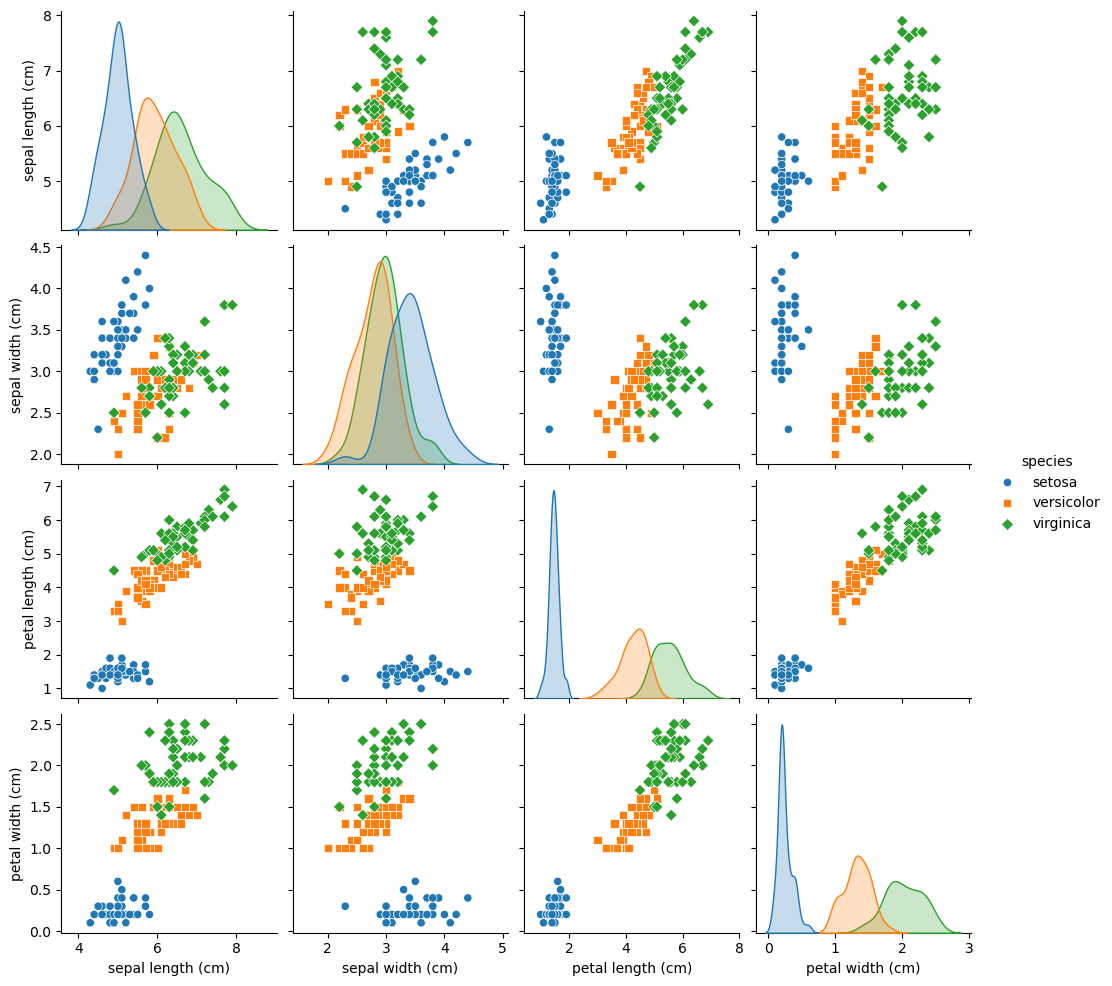

In [5]:
# Através da biblioteca seaborn, apresenta um gráfico com os dados do dataset iris
# No gráfico conterá 16 minigraficos, cada um deles apresentando as informações das características dos eixos x e y, dando um panorama geral dos dados
ax = sns.pairplot(df.drop(columns="target"), hue="species", markers=["o", "s", "D"])

In [6]:
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

X = df.iloc[:, :-2].values # Separa em X os dados das características 
y = df.iloc[:, -1].values.ravel() # Separa em y os dados dos rótulos (espécies)

# Divide os dados em conjuntos de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o modelo LDA para redução de 2 componentes
lda = LinearDiscriminantAnalysis(n_components=2)

# Treina os valores de X_train e y_train
X_train_lda = lda.fit_transform(X_train, y_train)  # Obtem um novo X (X_train_lda) de dimensionalidade 2 com base no X_train

# Com o modelo treinado com X_train e y_train
X_test_lda = lda.transform(X_test) # Obtem um novo X (X_test_lda) de dimensionalidade 2 com base no X_test

print(f"Tamanho do X_train: {X_train.shape[1]}")
print(f"Tamanho do X_train_lda: {X_train_lda.shape[1]}")

print(f"Tamanho do X_test: {X_test.shape[1]}")
print(f"Tamanho do X_test_lda: {X_test_lda.shape[1]}")




Tamanho do X_train: 4
Tamanho do X_train_lda: 2
Tamanho do X_test: 4
Tamanho do X_test_lda: 2


In [7]:
# Coloca os dados de X_train_lda e y_train_lda em um Dataframe pora melhor visualização
df_lda_train = pd.DataFrame(X_train_lda, columns=["LDA Component 1", "LDA Component 2"])
df_lda_train["species"] = y_train # Cria a coluna "species" que receberá os rótulos das espécies
df_lda_train.head()

,LDA Component 1,LDA Component 2,species
0,-0.514612,-1.882729,versicolor
1,-3.549638,-0.715341,virginica
2,-4.527751,0.400175,virginica
3,-1.036480,0.011181,versicolor
4,-5.975968,2.759810,virginica


<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

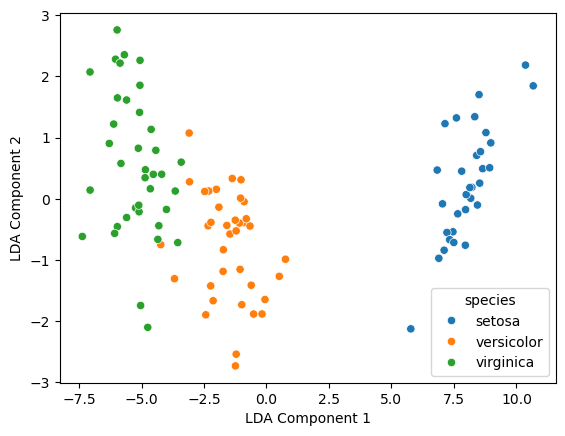

In [8]:
# Cria o scatter plot com os dados de treino reduzidos para 2 dimensões 
sns.scatterplot(df_lda_train.sort_values(by="species"), x="LDA Component 1", y="LDA Component 2", hue="species")


In [9]:
# Coloca os dados de X_test_lda e y_test_lda em um Dataframe pora melhor visualização
df_lda_test = pd.DataFrame(X_test_lda, columns=["LDA Component 1", "LDA Component 2"])
df_lda_test["species"] = y_test
df_lda_test.head()

,LDA Component 1,LDA Component 2,species
0,-2.054641,-1.115118,versicolor
1,8.784022,1.256282,setosa
2,-8.953380,-0.572433,virginica
3,-2.189444,-0.097840,versicolor
4,-2.208570,-0.720199,versicolor


<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

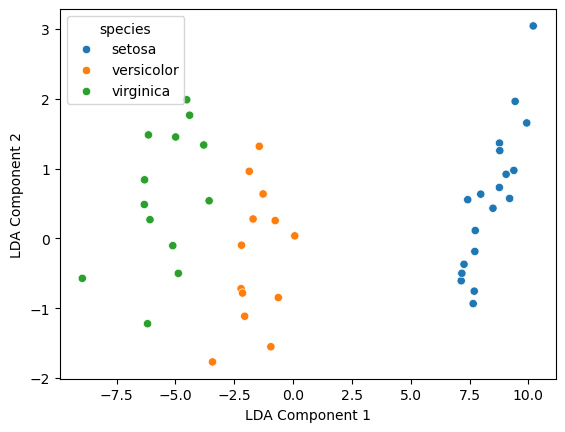

In [10]:
# Cria o scatter plot com os dados de teste do conjunto reduzido para 2 dimensões
sns.scatterplot(df_lda_test.sort_values("species"), x="LDA Component 1", y="LDA Component 2", hue="species")

In [11]:
# Obtem as predições dos dados com base nos valores treinados
y_pred_lda_train = lda.predict(X_train)
y_pred_lda_test = lda.predict(X_test)

# Adicionar aos dataframes 
df_lda_train["species_predicted"] = y_pred_lda_train
df_lda_test["species_predicted"] = y_pred_lda_test

df_lda_train.head()


,LDA Component 1,LDA Component 2,species,species_predicted
0,-0.514612,-1.882729,versicolor,versicolor
1,-3.549638,-0.715341,virginica,versicolor
2,-4.527751,0.400175,virginica,virginica
3,-1.036480,0.011181,versicolor,versicolor
4,-5.975968,2.759810,virginica,virginica


In [12]:
df_lda_test.head()

,LDA Component 1,LDA Component 2,species,species_predicted
0,-2.054641,-1.115118,versicolor,versicolor
1,8.784022,1.256282,setosa,setosa
2,-8.953380,-0.572433,virginica,virginica
3,-2.189444,-0.097840,versicolor,versicolor
4,-2.208570,-0.720199,versicolor,versicolor


In [13]:
# Calculando a acurácia do modelo, comparando o gabarito (y_train) com os valores de y_pred_lda_train
lda_train_acc = accuracy_score(y_train, y_pred_lda_train)
print(f"Acurácia do LDA no dataset de Treino: {lda_train_acc}")

# Calculando a acurácia do modelo nos dados de teste
lda_test_acc = accuracy_score(y_test, y_pred_lda_test)
print(f"Acurácia do LDA no dataset de Treino: {lda_test_acc}")

Acurácia do LDA no dataset de Treino: 0.9714285714285714
Acurácia do LDA no dataset de Treino: 1.0


In [14]:
# Identificando quais foram os casos de erro
df_lda_train_erros = df_lda_train.query("species != species_predicted")
df_lda_train_erros.head()

,LDA Component 1,LDA Component 2,species,species_predicted
1,-3.549638,-0.715341,virginica,versicolor
44,-3.094060,1.075211,versicolor,virginica
47,-4.228972,-0.748766,versicolor,virginica


<Axes: xlabel='LDA Component 1', ylabel='LDA Component 2'>

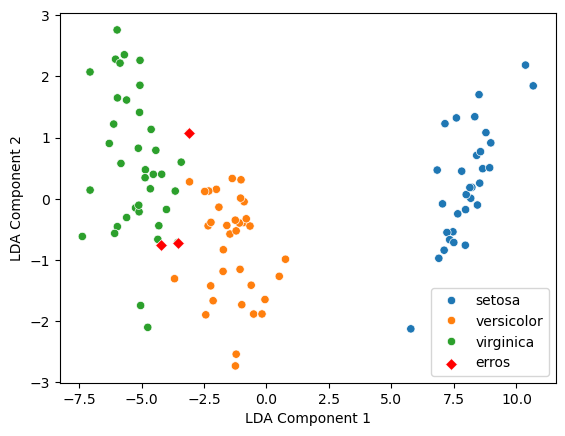

In [15]:
# Gráficos mostrando onde foram os erros 
sns.scatterplot(df_lda_train.sort_values(by="species"), x="LDA Component 1", y="LDA Component 2", hue="species")
sns.scatterplot(df_lda_train_erros.sort_values(by="species"), x="LDA Component 1", y="LDA Component 2", color="red", marker="D", label="erros")

In [16]:
# QDA (Quadratic Discriminant Analysis)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda_train = qda.predict(X_train)
y_pred_qda_test = qda.predict(X_test)

qda_train_acc = accuracy_score(y_train, y_pred_qda_train)
print(f"Acurácia do QDA no dataset de Treino: {qda_train_acc}")

qda_test_acc = accuracy_score(y_test, y_pred_qda_test)
print(f"Acurácia do QDA no dataset de Teste: {qda_test_acc}")

Acurácia do QDA no dataset de Treino: 0.9809523809523809
Acurácia do QDA no dataset de Teste: 1.0


In [17]:
df_qda_train = pd.DataFrame(X_train, columns=df.iloc[:, :-2].columns)
df_qda_train["species"] = y_train

df_qda_train["species_predicted"] = y_pred_qda_train

df_qda_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
0,5.5,2.4,3.7,1.0,versicolor,versicolor
1,6.3,2.8,5.1,1.5,virginica,versicolor
2,6.4,3.1,5.5,1.8,virginica,virginica
3,6.6,3.0,4.4,1.4,versicolor,versicolor
4,7.2,3.6,6.1,2.5,virginica,virginica


In [18]:
df_qda_train_erros = df_qda_train.query("species != species_predicted")
df_qda_train_erros.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
1,6.3,2.8,5.1,1.5,virginica,versicolor
47,6.0,2.7,5.1,1.6,versicolor,virginica


In [21]:
# RDA (Regulamentory Discriminity Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-2].values
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rda = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
rda.fit(X_train, y_train)

y_pred_rda_train = rda.predict(X_train)
y_pred_rda_test = rda.predict(X_test)


rda_train_acc = accuracy_score(y_train, y_pred_rda_train)
print(f"Acurácia do RDA no dataset de Treino: {rda_train_acc}")

rda_test_acc = accuracy_score(y_test, y_pred_rda_test)
print(f"Acurácia do RDA no dataset de Teste: {rda_test_acc}")

df_rda_train = pd.DataFrame(X_train, columns=df.iloc[:, :-2].columns)
df_rda_train["species"] = y_train

df_rda_train["species_predicted"] = y_pred_rda_train
df_rda_train.head()


Acurácia do RDA no dataset de Treino: 0.9714285714285714
Acurácia do RDA no dataset de Teste: 1.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
0,5.5,2.4,3.7,1.0,setosa,versicolor
1,6.3,2.8,5.1,1.5,setosa,versicolor
2,6.4,3.1,5.5,1.8,setosa,virginica
3,6.6,3.0,4.4,1.4,setosa,versicolor
4,7.2,3.6,6.1,2.5,NaN,virginica


In [22]:
df_rda_train_erros = df_rda_train.query("species != species_predicted")
df_rda_train_erros


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_predicted
0,5.5,2.4,3.7,1.0,setosa,versicolor
1,6.3,2.8,5.1,1.5,setosa,versicolor
2,6.4,3.1,5.5,1.8,setosa,virginica
3,6.6,3.0,4.4,1.4,setosa,versicolor
4,7.2,3.6,6.1,2.5,NaN,virginica
...,...,...,...,...,...,...
99,5.4,3.4,1.7,0.2,versicolor,setosa
100,6.1,2.8,4.0,1.3,virginica,versicolor
102,5.8,4.0,1.2,0.2,virginica,setosa
103,5.8,2.6,4.0,1.2,virginica,versicolor
